In [2]:
import os
os.getcwd()

'/content'

In [2]:
!cd sample_data

In [4]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(12, 8)})
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
mpl.rcParams['axes.unicode_minus']=False
%matplotlib inline

<ipython-input-4-d6f7d04ed44d>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
import pandas as pd
import numpy as np

path = '/content'  #bike_demand'
df_train = pd.read_csv(os.path.join(path, 'train.csv')) #parse_dates = ["datetime"]
df_test = pd.read_csv(os.path.join(path, 'test.csv'))
samplesub = pd.read_csv(os.path.join(path,'sampleSubmission.csv'))
display(df_train)
display(df_test)
display(samplesub)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [24]:
for col in df_train.columns:
  print(df_train[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0


In [7]:
for col in df_train.columns:
  print(f"column names: {col},     \t percentage of nan value: {df_train[col].isnull().sum()/df_train[col].shape[0]}")

column names: datetime,     	 percentage of nan value: 0.0
column names: season,     	 percentage of nan value: 0.0
column names: holiday,     	 percentage of nan value: 0.0
column names: workingday,     	 percentage of nan value: 0.0
column names: weather,     	 percentage of nan value: 0.0
column names: temp,     	 percentage of nan value: 0.0
column names: atemp,     	 percentage of nan value: 0.0
column names: humidity,     	 percentage of nan value: 0.0
column names: windspeed,     	 percentage of nan value: 0.0
column names: casual,     	 percentage of nan value: 0.0
column names: registered,     	 percentage of nan value: 0.0
column names: count,     	 percentage of nan value: 0.0


<Axes: >

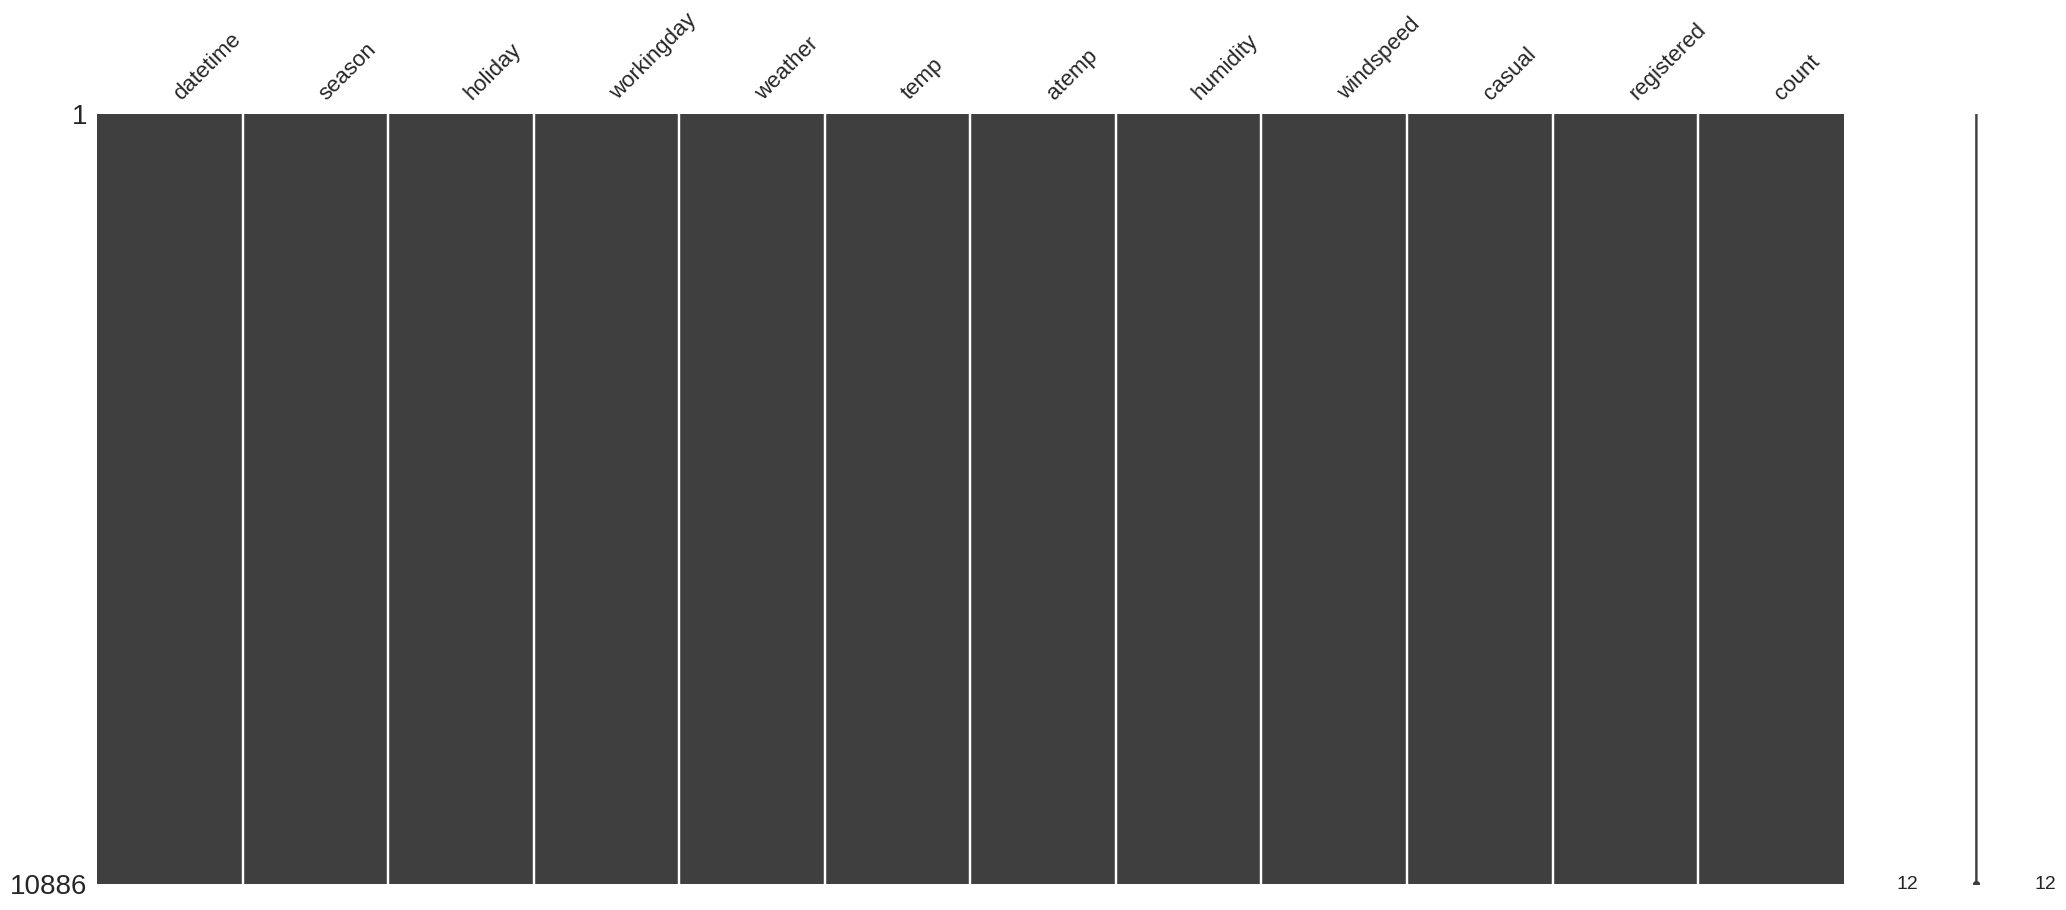

In [8]:
import missingno as msno
msno.matrix(df_train.iloc[:,:])
#msno.matrix(df_train)

In [37]:
df_train['count'].skew()

1.2420662117180776

<Axes: xlabel='count', ylabel='Density'>

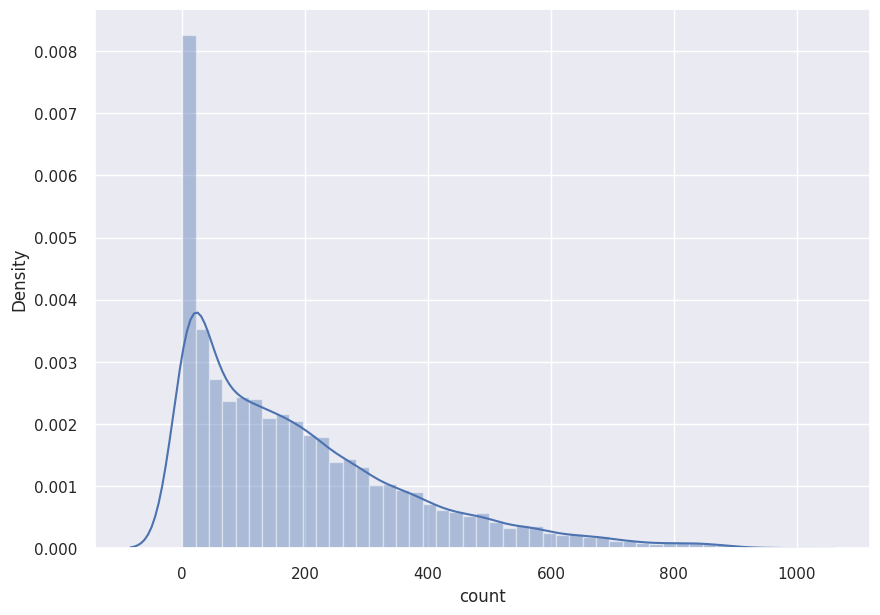

In [66]:
f, ax = plt.subplots(figsize=(10,7))
#f.set_size_inches(18,10)
sns.distplot(df_train['count'], label="skewness:{:2f}".format(df_train['count'].skew()), ax=ax)


### EDA

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

In [11]:
df_train['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.2 KB


In [6]:
#train set
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour
df_train['minute'] = df_train['datetime'].dt.minute
df_train['second'] = df_train['datetime'].dt.second
df_train['dayofweek']= df_train["datetime"].dt.dayofweek #월(0)

#test set
df_test['year'] = df_test['datetime'].dt.year
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.day
df_test['hour'] = df_test['datetime'].dt.hour
df_test['minute'] = df_test['datetime'].dt.minute
df_test['second'] = df_test['datetime'].dt.second
df_train['dayofweek']= df_train["datetime"].dt.dayofweek #월(0)

In [13]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

[Text(0.5, 1.0, 'bike demand by week(monday(0),..,sunday(6))')]

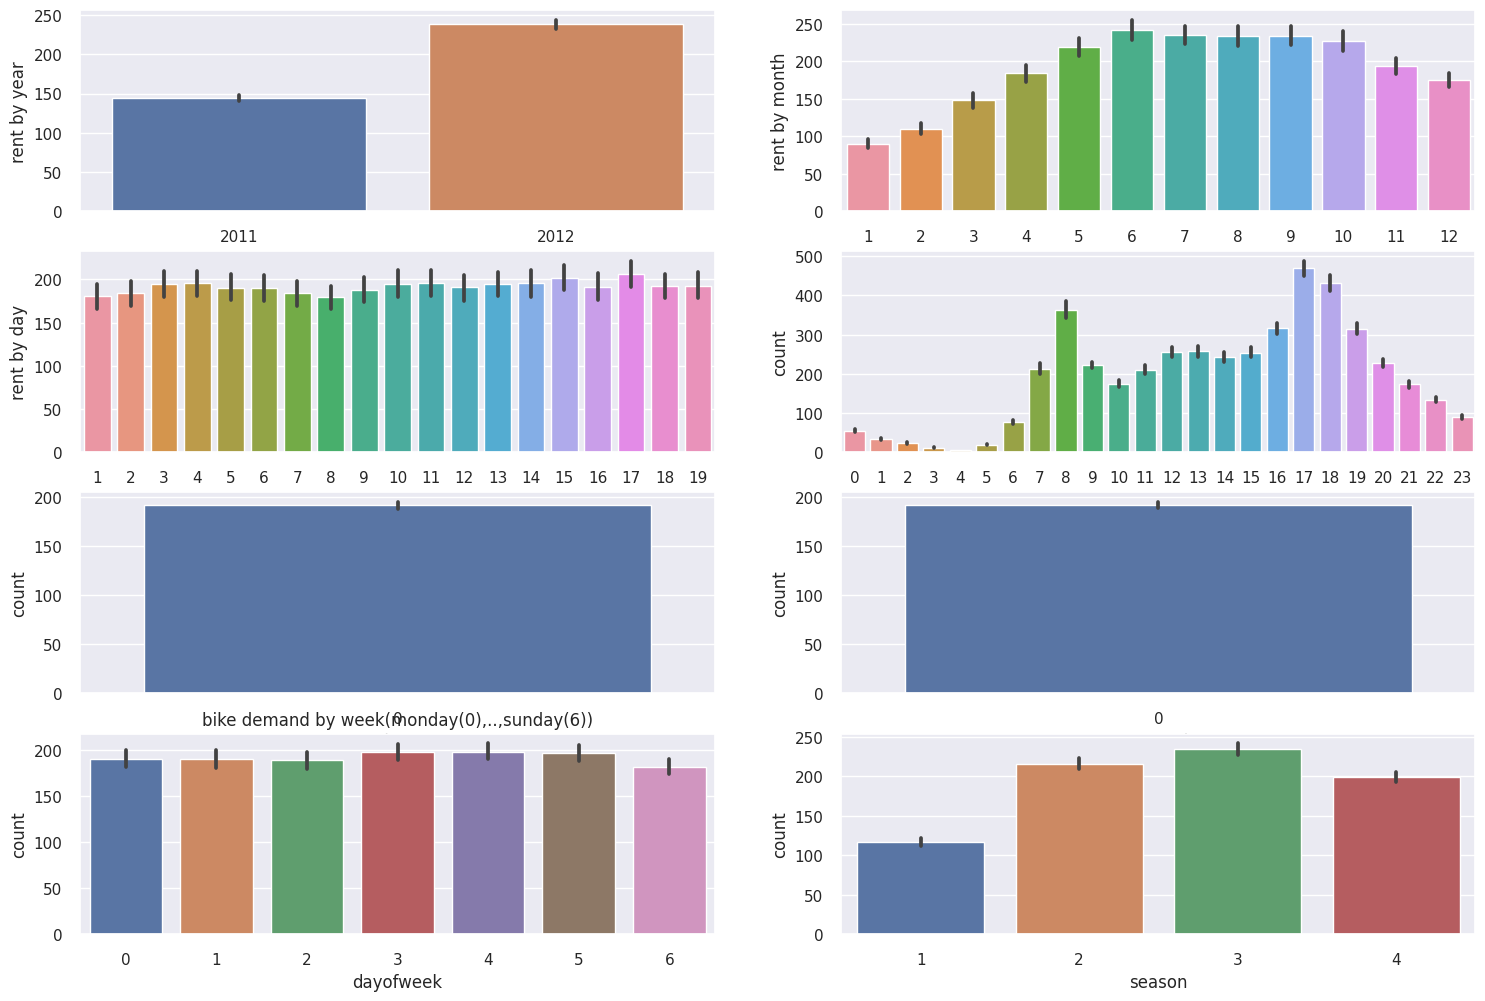

In [83]:
fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6),(ax7,ax8)), = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(18,12)
sns.barplot(df_train, x="year", y="count", ax = ax1)
sns.barplot(df_train, x="month", y="count", ax = ax2)
sns.barplot(df_train, x="day", y="count", ax = ax3)
sns.barplot(df_train, x="hour", y="count", ax = ax4)
sns.barplot(df_train, x="minute", y="count", ax = ax5)
sns.barplot(df_train, x="second", y="count", ax = ax6)
sns.barplot(df_train, x='dayofweek', y='count', ax=ax7)
sns.barplot(df_train, x='season', y='count', ax=ax8)

ax1.set(ylabel="rent by year")
ax2.set(ylabel="rent by month")
ax3.set(ylabel="rent by day")
ax7.set(title='bike demand by week(monday(0),..,sunday(6))')


# fig, (ax1,ax2) = plt.subplots(figsize=(8,5))
# sns.barplot(df_train, x='dayofweek', y='count', ax=ax1)
# sns.barplot(df_train, x='season', y='count', ax=ax2)

# #f, ax = plt.subplots(figsize=(10,7))
# #f.set_size_inches(18,10)
# ax1.set(title='bike demand by week(monday(0),..,sunday(6))')

In [81]:
df_train['dayofweek'].value_counts().sort_index()

0    1551
1    1539
2    1551
3    1553
4    1529
5    1584
6    1579
Name: dayofweek, dtype: int64

- 2012년도 수요량이 더 많음.
- 겨울보단 여름
- 새벽시간대에는 거의 없고, 8시, 17~18시등 출퇴근 시간에 수요량이 많음.
- 일요일이 다른 요일보단 적음

<Axes: xlabel='hour', ylabel='count'>

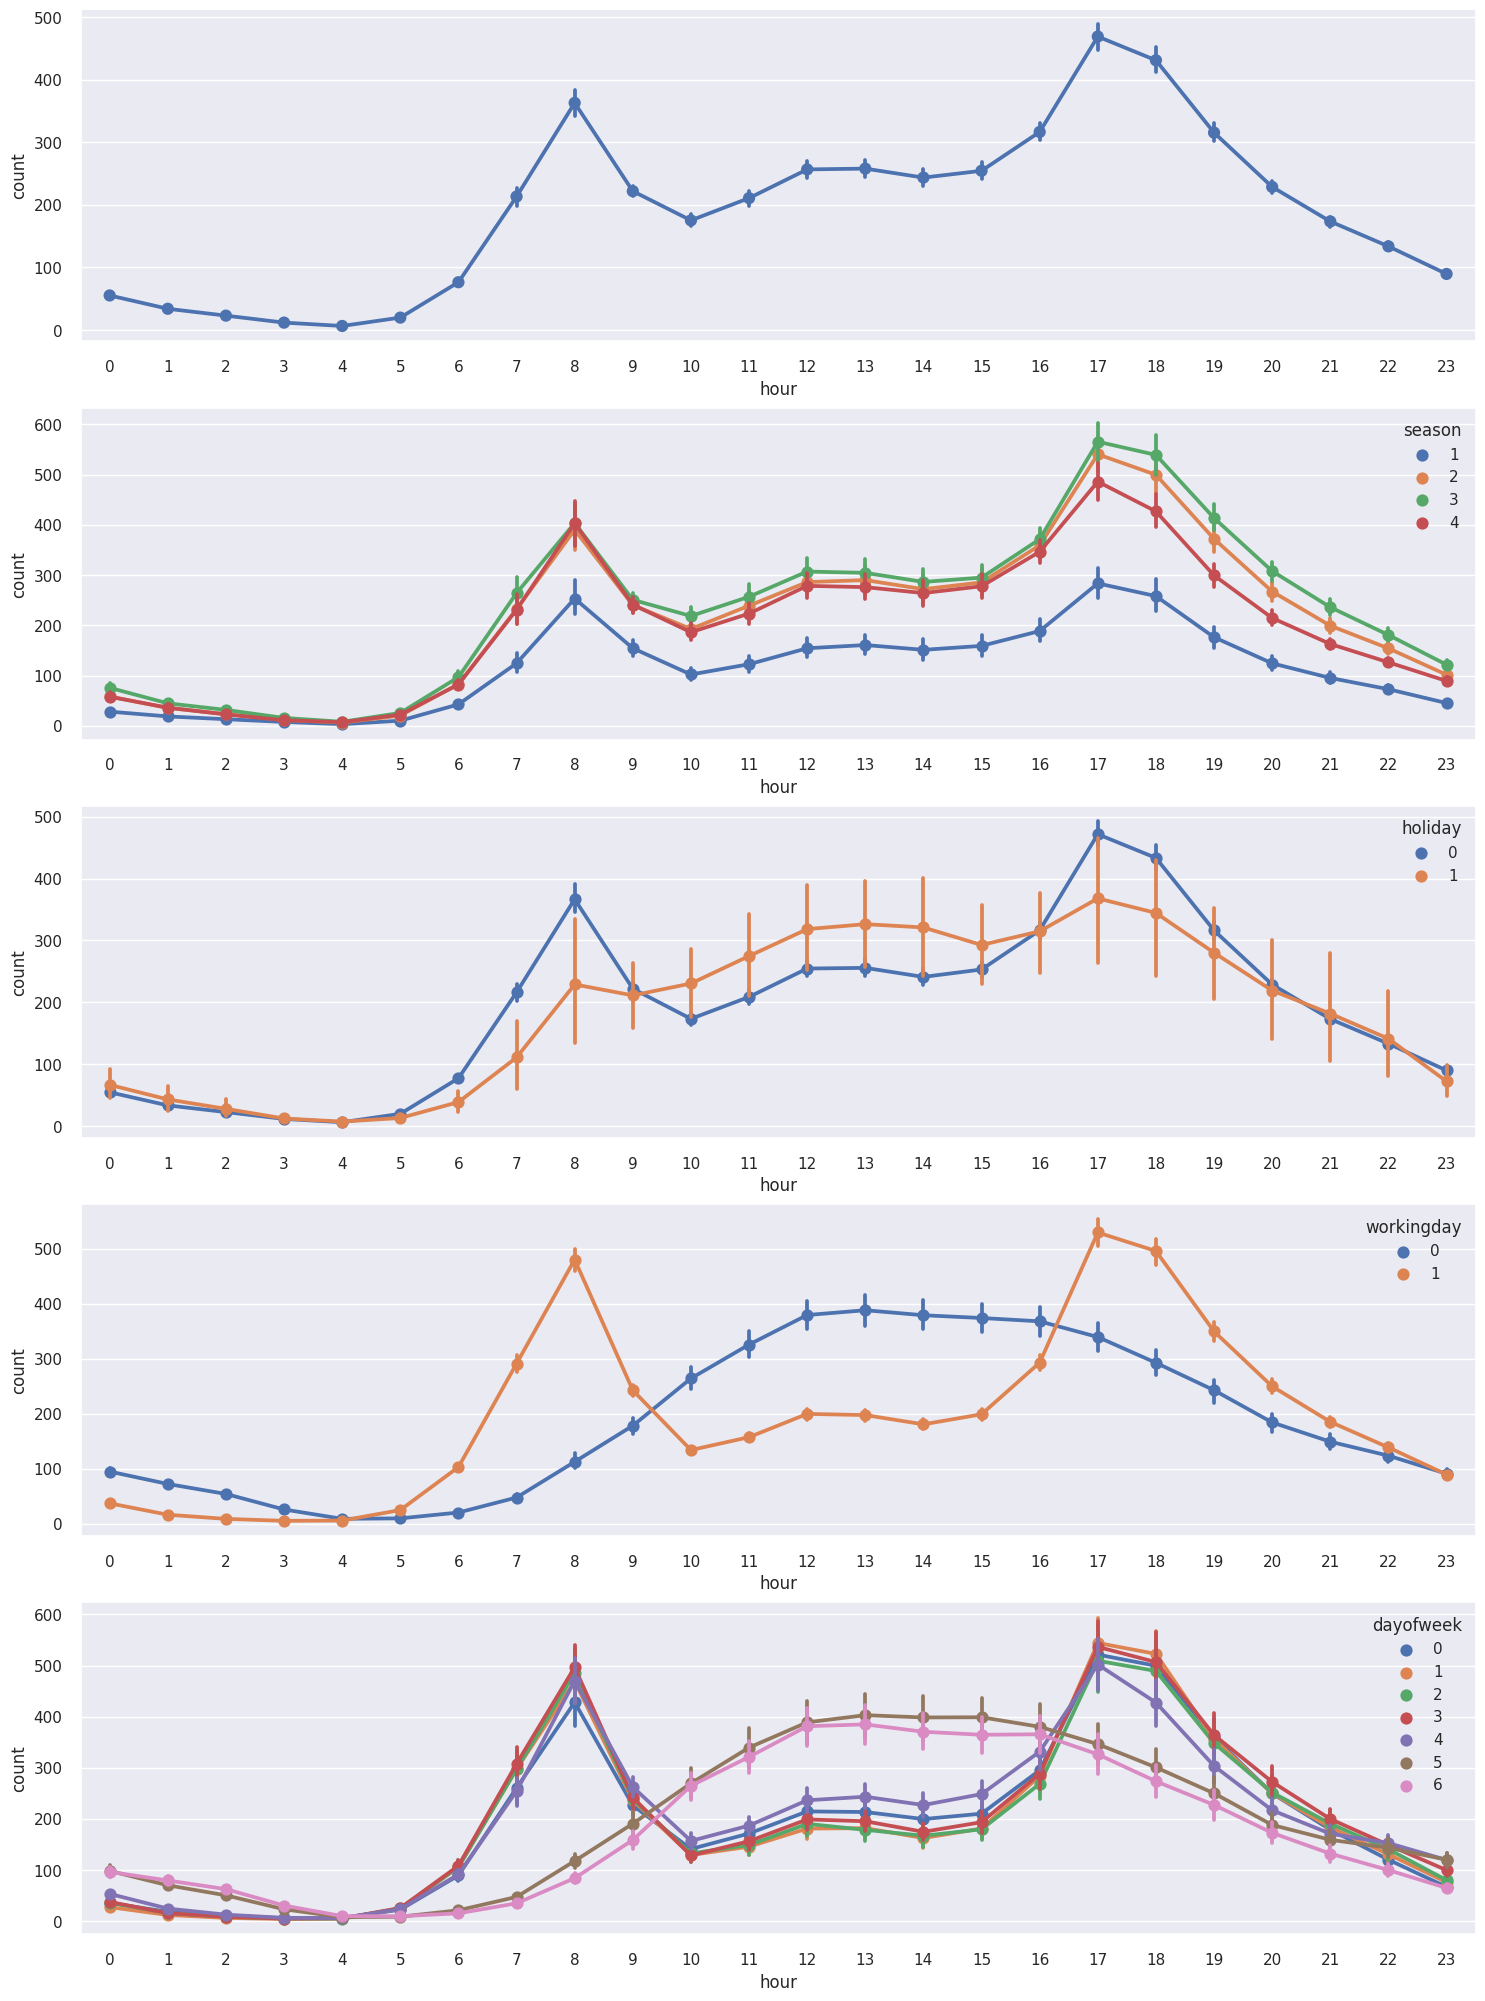

In [85]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, figsize=(18,25))

sns.pointplot(df_train, x='hour', y='count', ax=ax1)
sns.pointplot(df_train, x='hour', y='count', ax=ax2, hue='season')
sns.pointplot(df_train, x='hour', y='count', ax=ax3, hue='holiday')
sns.pointplot(df_train, x='hour', y='count', ax=ax4, hue='workingday')
sns.pointplot(df_train, x='hour', y='count', ax=ax5, hue='dayofweek')


In [84]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [86]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


<Axes: >

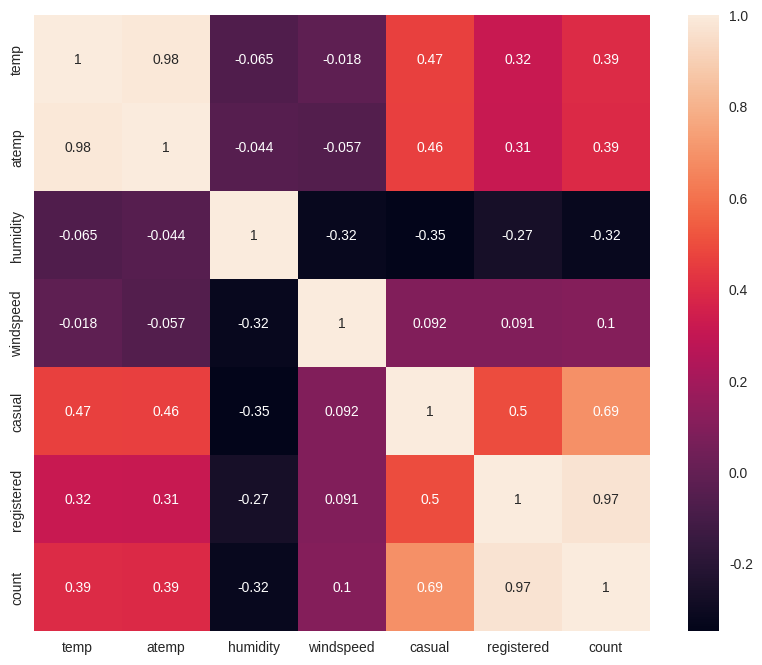

In [14]:
col_list = ['temp','atemp','humidity', 'windspeed','casual', 'registered', 'count']

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_train[col_list].corr(), annot=True, square=True)

-  연속변수간의 관계 살펴보기

<Axes: xlabel='temp', ylabel='count'>

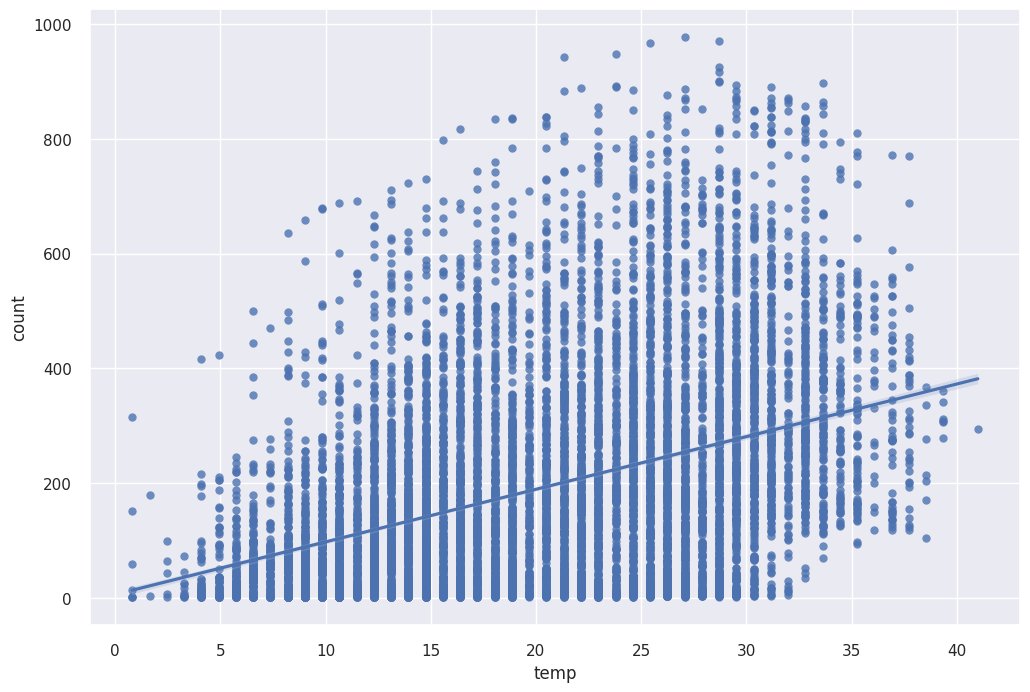

In [100]:
sns.regplot(x='temp', y='count', data =df_train[['temp','count']])

In [101]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

<Axes: xlabel='humidity', ylabel='count'>

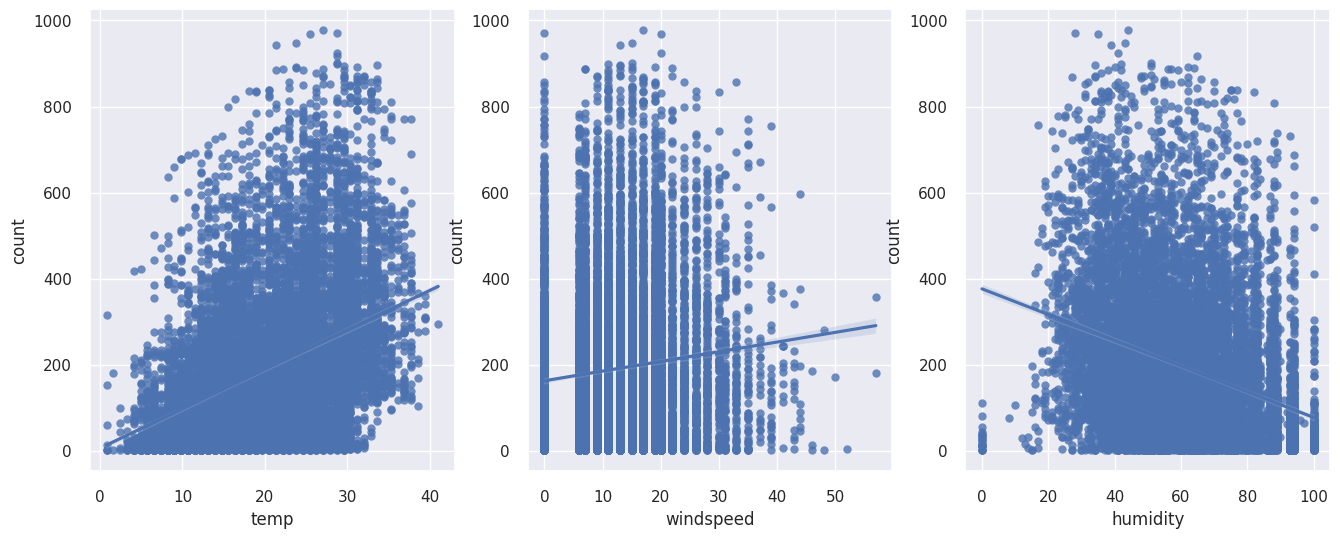

In [105]:
#counts와 유의하지 않은 변수들만 추출
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16,6))
sns.regplot(x='temp', y='count', data=df_train[['temp','count']], fit_reg=True, scatter=True, ax=ax1)
sns.regplot(x='windspeed', y='count', data=df_train[['windspeed','count']], fit_reg=True, scatter=True, ax=ax2)
sns.regplot(x='humidity', y='count', data=df_train[['humidity','count']], fit_reg=True, scatter=True, ax=ax3)


<Axes: title={'center': 'test windspeed'}, xlabel='windspeed', ylabel='count'>

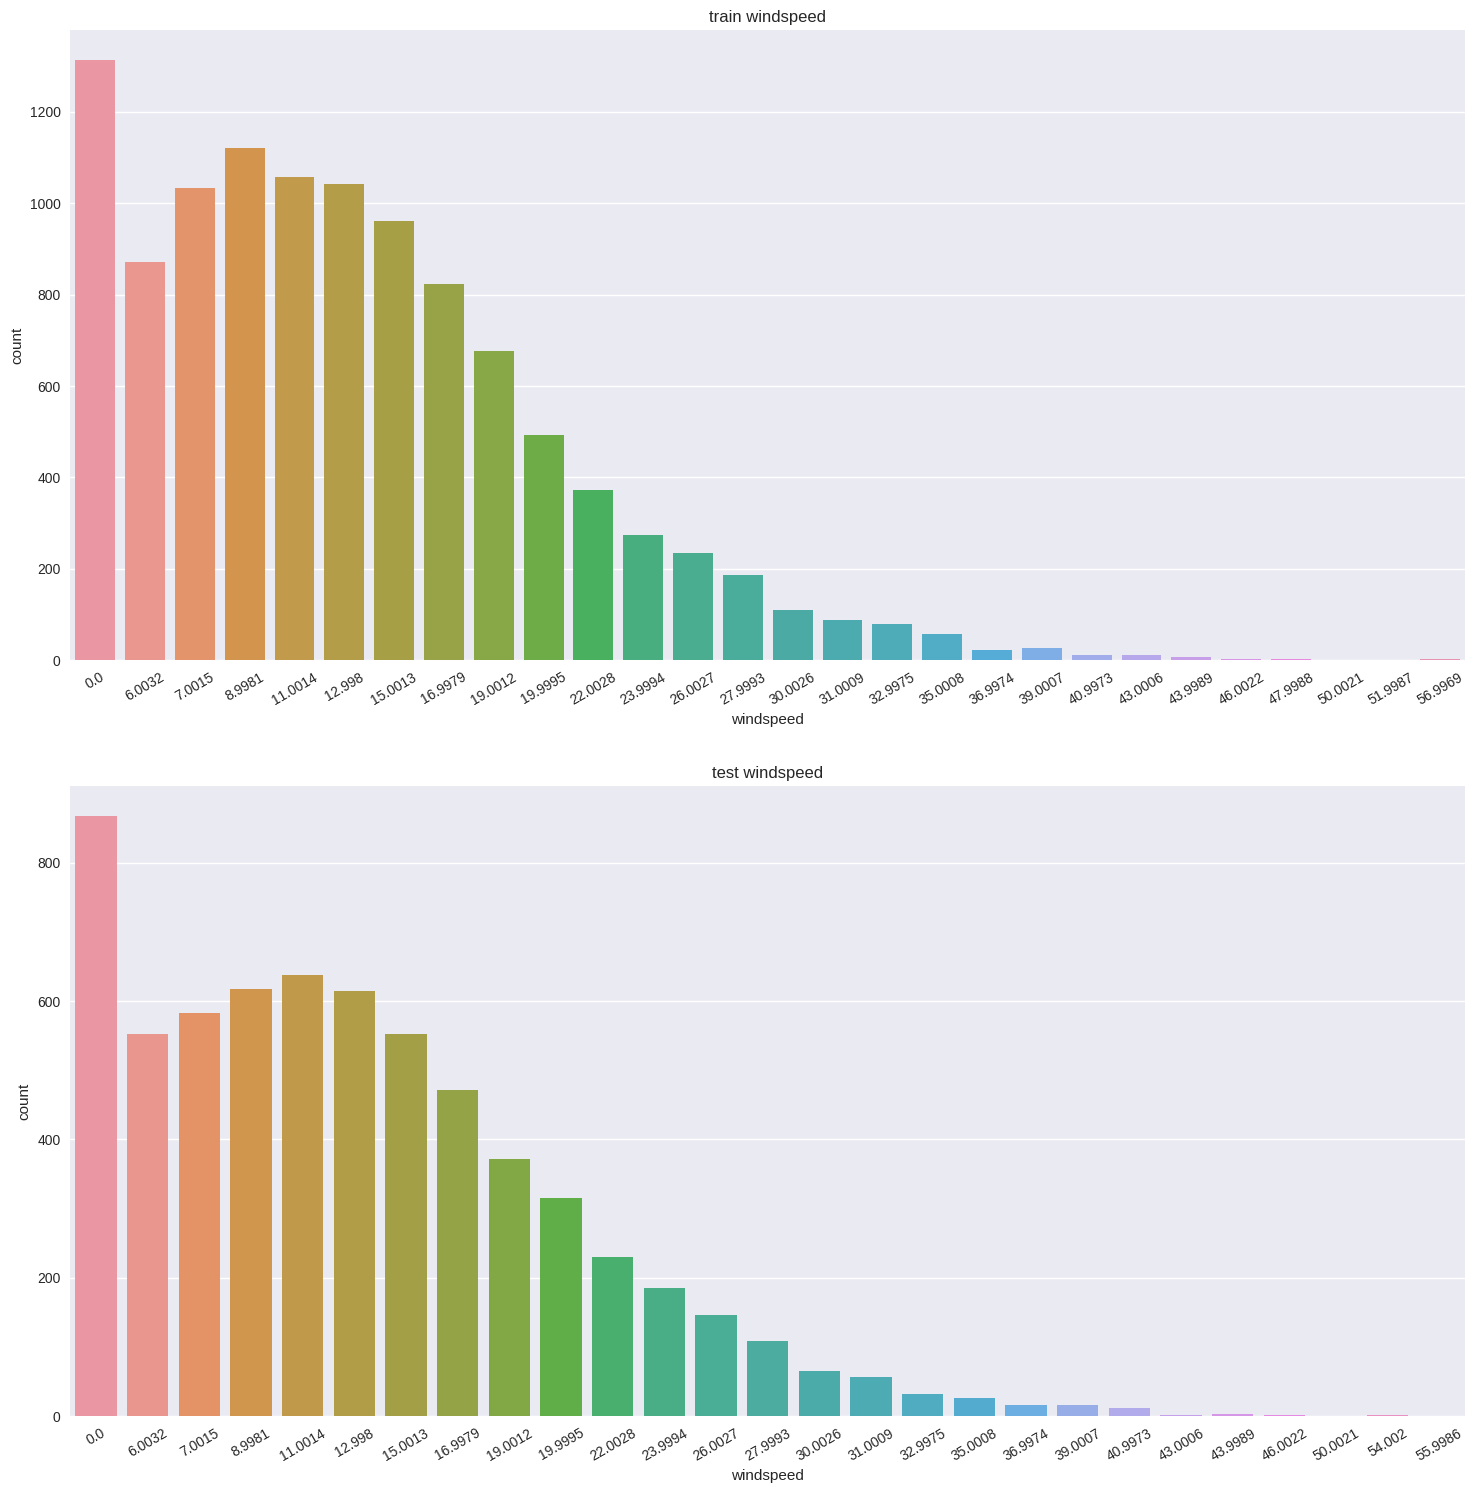

In [11]:
fig, ax = plt.subplots(nrows=2, figsize=(18,18))

plt.sca(ax[0]) #현재 축(ax)을 지정된 축(ax)으로 설정
plt.xticks(rotation=30)
ax[0].set(title='train windspeed')
sns.countplot(data=df_train, x="windspeed", ax=ax[0])

plt.sca(ax[1])
plt.xticks(rotation=30)
ax[1].set(title='test windspeed')
sns.countplot(data=df_test, x="windspeed", ax=ax[1])



In [14]:
df_train['datetime'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [7]:
def concat_year_month(datetime):
  return "{0}-{1}".format(datetime.year, datetime.month)

df_train['datetime'].apply(concat_year_month)

0         2011-1
1         2011-1
2         2011-1
3         2011-1
4         2011-1
          ...   
10881    2012-12
10882    2012-12
10883    2012-12
10884    2012-12
10885    2012-12
Name: datetime, Length: 10886, dtype: object

In [20]:
#df_train['datetime'].dt.year.astype(str) + '-' + df_train['datetime'].dt.month.astype(str)

0         2011-1
1         2011-1
2         2011-1
3         2011-1
4         2011-1
          ...   
10881    2012-12
10882    2012-12
10883    2012-12
10884    2012-12
10885    2012-12
Name: datetime, Length: 10886, dtype: object

In [8]:
df_train['year_month'] = df_train['datetime'].apply(concat_year_month)
df_test['year_month'] = df_test['datetime'].apply(concat_year_month)

print(df_train.shape)
print(df_train[['datetime','year_month']])


(10886, 20)
                 datetime year_month
0     2011-01-01 00:00:00     2011-1
1     2011-01-01 01:00:00     2011-1
2     2011-01-01 02:00:00     2011-1
3     2011-01-01 03:00:00     2011-1
4     2011-01-01 04:00:00     2011-1
...                   ...        ...
10881 2012-12-19 19:00:00    2012-12
10882 2012-12-19 20:00:00    2012-12
10883 2012-12-19 21:00:00    2012-12
10884 2012-12-19 22:00:00    2012-12
10885 2012-12-19 23:00:00    2012-12

[10886 rows x 2 columns]


[]

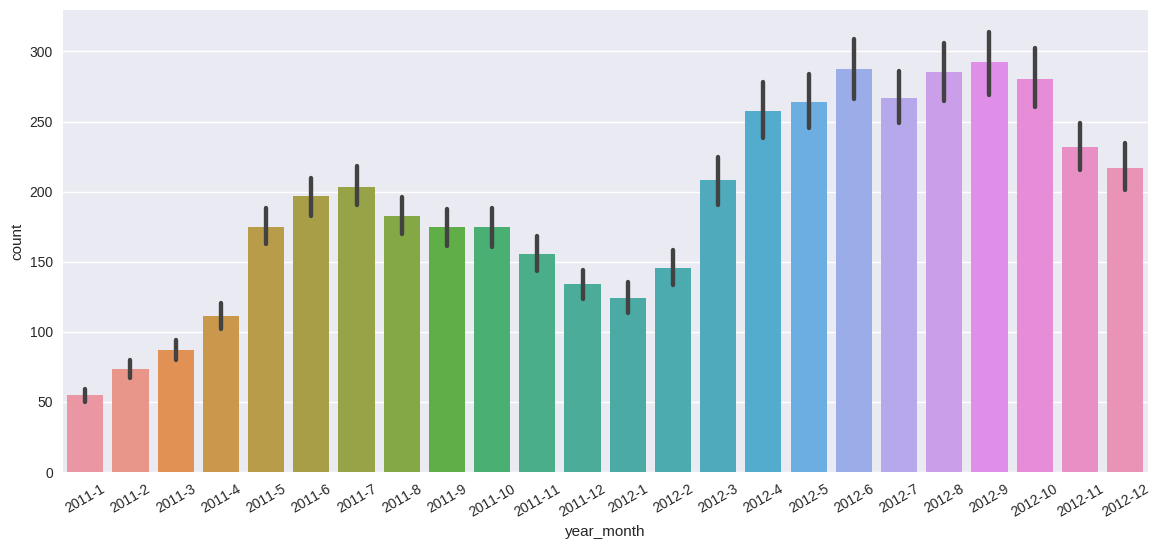

In [26]:
fig, ax = plt.subplots(figsize=(14,6))
plt.sca(ax)
plt.xticks(rotation=30)
sns.barplot(data=df_train, x="year_month", y="count")
ax.set()

### 이상치 제거하기



In [27]:
np.percentile(df_train['count'],25)

42.0

In [29]:
df_train.loc[df_train['count']<np.percentile(df_train['count'],25)].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10840, 10841, 10842, 10843, 10862, 10863, 10864, 10865, 10866,
            10867],
           dtype='int64', length=2702)

In [9]:
from collections import Counter

def detect_outliers(df, n, features):
  outlier_indices=[]
  for col in features:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col],75)
    IQR = Q3 - Q1

    outlier_step = 1.5*IQR
    outlier_1 = Q1 - outlier_step
    outlier_3 = Q3 + outlier_step
    outlier_col = df.loc[(df[col]<outlier_1) | (df[col]>outlier_3)].index
    outlier_indices.extend(outlier_col)

  outlier_dices = Counter(outlier_indices)
  multiple_outliers = list(k for k, v in outlier_dices.items() if v>n)

  return multiple_outliers

In [10]:
detect_outliers(df_train, 2, ['temp','atemp','humidity', 'windspeed','casual', 'registered', 'count'])

[7017,
 7473,
 7991,
 8000,
 8528,
 9243,
 9244,
 9479,
 9652,
 9655,
 6658,
 6779,
 6825,
 6849,
 6850,
 6897,
 7088,
 7640,
 7641,
 7664,
 7881,
 8002,
 8024,
 8048,
 8049,
 8456,
 8768,
 8793,
 8794,
 8962,
 8984,
 8986,
 9008,
 9267,
 9296,
 9320,
 9392,
 9632,
 9800,
 9920]

In [11]:
drop_outline = detect_outliers(df_train, 2, ['temp','atemp','humidity', 'windspeed','casual', 'registered', 'count'])
df_train.loc[drop_outline]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
7017,2012-04-10 17:00:00,2,0,1,1,22.96,26.515,21,35.0008,88,656,744,2012,4,10,17,0,0,1,2012-4
7473,2012-05-10 18:00:00,2,0,1,1,22.96,26.515,35,35.0008,109,661,770,2012,5,10,18,0,0,3,2012-5
7991,2012-06-13 08:00:00,2,0,1,2,25.42,29.545,73,35.0008,41,672,713,2012,6,13,8,0,0,2,2012-6
8000,2012-06-13 17:00:00,2,0,1,1,29.52,32.575,32,32.9975,75,782,857,2012,6,13,17,0,0,2,2012-6
8528,2012-07-16 17:00:00,3,0,1,3,31.16,36.365,66,39.0007,86,669,755,2012,7,16,17,0,0,0,2012-7
9243,2012-09-08 12:00:00,3,0,0,1,32.80,37.880,55,32.9975,220,474,694,2012,9,8,12,0,0,5,2012-9
9244,2012-09-08 13:00:00,3,0,0,1,33.62,38.635,52,35.0008,233,435,668,2012,9,8,13,0,0,5,2012-9
9479,2012-09-18 08:00:00,3,0,1,2,27.06,30.305,83,36.9974,32,640,672,2012,9,18,8,0,0,1,2012-9
9652,2012-10-06 13:00:00,4,0,0,2,26.24,31.060,57,35.0008,310,400,710,2012,10,6,13,0,0,5,2012-10
9655,2012-10-06 16:00:00,4,0,0,1,24.60,31.060,43,35.0008,317,342,659,2012,10,6,16,0,0,5,2012-10


In [12]:
df_train = df_train.drop(drop_outline, axis=0).reset_index(drop=True)

In [35]:
df_train.shape

(10846, 20)

In [21]:
num_cols = df_train[['temp','atemp','humidity', 'windspeed','casual', 'registered', 'count']]
for col in num_cols:
  print("col",
        "skewness:{:05.2f}".format(df_train[col].skew()),
        ' ',
        "kurtosis:{:06.2f}".format(df_train[col].kurt())
  )



col skewness:00.01   kurtosis:-00.91
col skewness:-0.10   kurtosis:-00.85
col skewness:-0.09   kurtosis:-00.76
col skewness:00.58   kurtosis:000.63
col skewness:02.52   kurtosis:007.74
col skewness:01.51   kurtosis:002.61
col skewness:01.21   kurtosis:001.20


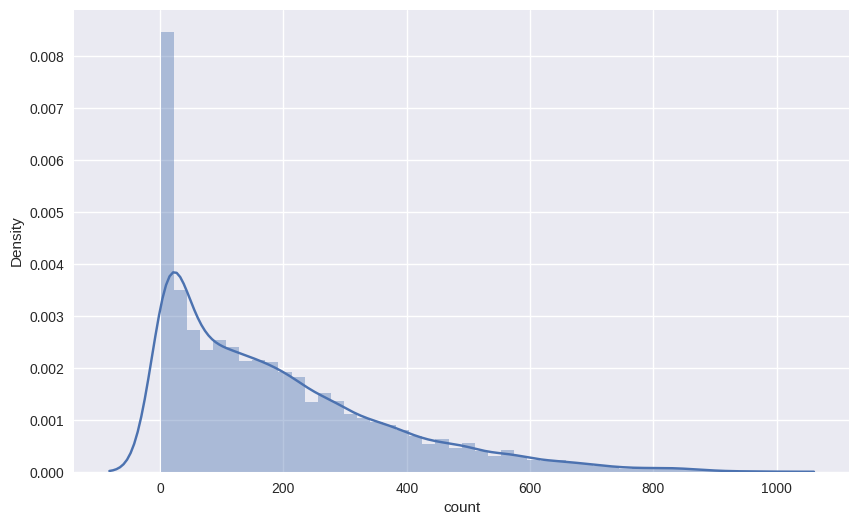

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
#f.set_size_inches(18,10)
sns.distplot(df_train['count'], label="skewness:{:2f}".format(df_train['count'].skew()), ax=ax)
plt.show()

### feature engineering

타겟변수의 skewness를 봤을 때, 왼쪽으로(0으로) 치우쳐져 있음을 알 수 있다.    
-> log를 취해줌으로써 정규화 시켜주기

In [13]:
df_train['count_log'] = df_train['count'].map(lambda i: np.log(i) if i>0 else 0)

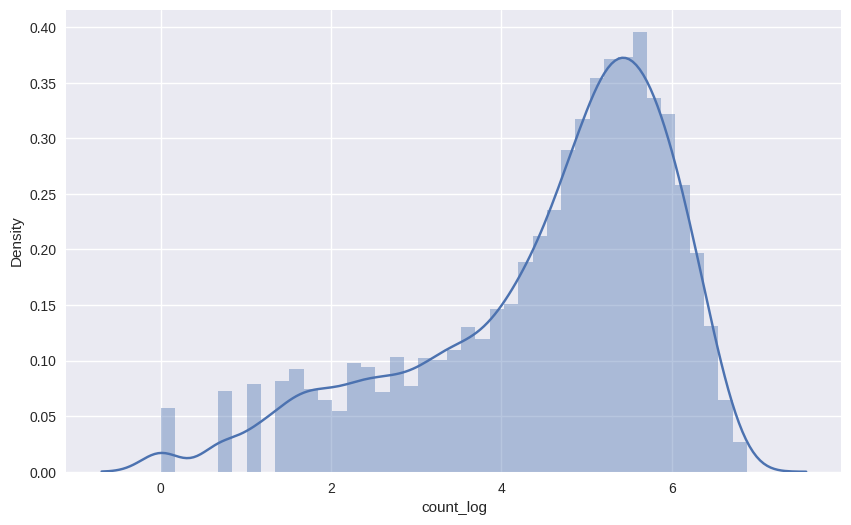

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
#f.set_size_inches(18,10)
sns.distplot(df_train['count_log'], label="skewness:{:2f}".format(df_train['count_log'].skew()), ax=ax)
plt.show()

- 모든 변수들의 왜도, 척도는 꼭 확인하기
  - 왜도 기준 0 <- 데이터 분포의 좌우 비대칭도를 나타내는 척도
    - 정규분포처럼 좌우대칭을 이룰 수록 왜도값은 작아진다.
  - 척도 기준 3 <- 분포가 정규분포보다 얼마나 뾰족하거나 완만한지의 정도를 나타내는 척도   
    (3보다 크면 뾰족, 작으면 완만한 구름 모양)

In [14]:
trainWind0 = df_train.loc[df_train['windspeed']==0]
trainWindNot0 = df_train.loc[df_train['windspeed']!=0]
#풍속이 0인 경우는 거의 없다고 판단

In [15]:
print(trainWind0.shape) #1311개
print(trainWindNot0.shape) #9535개

(1311, 21)
(9535, 21)


#### 결측값 처리 방법
#### 1) 결측값인 풍속이 0인 데이터를 예측한 값으로 대체해주는 방법

- 독립변수들과 풍속이 0이 아닌 데이터(trainWindNot0)를 RandomForest로 학습시켜준 뒤,   
  학습 시킨 모델을 통해 풍속이 0인 데이터를 예측하는 방법

#### 2) 결측값을 앞 혹은 뒷 방향으로 채우기
#### 3) 결측값을 변수별 평균으로 채우기
#### 4) 0이나 -9999값으로 채우기
#### 5) 결측값을 예측된 값으로 대체하기


-> windspeed=0인 경우는 null 값을 0으로 대체해준 것이라고 판단.  
즉, 1번의 방법을 사용하여 결측값을 처리해준다.

<Axes: title={'center': 'test windspeed'}, xlabel='windspeed', ylabel='count'>

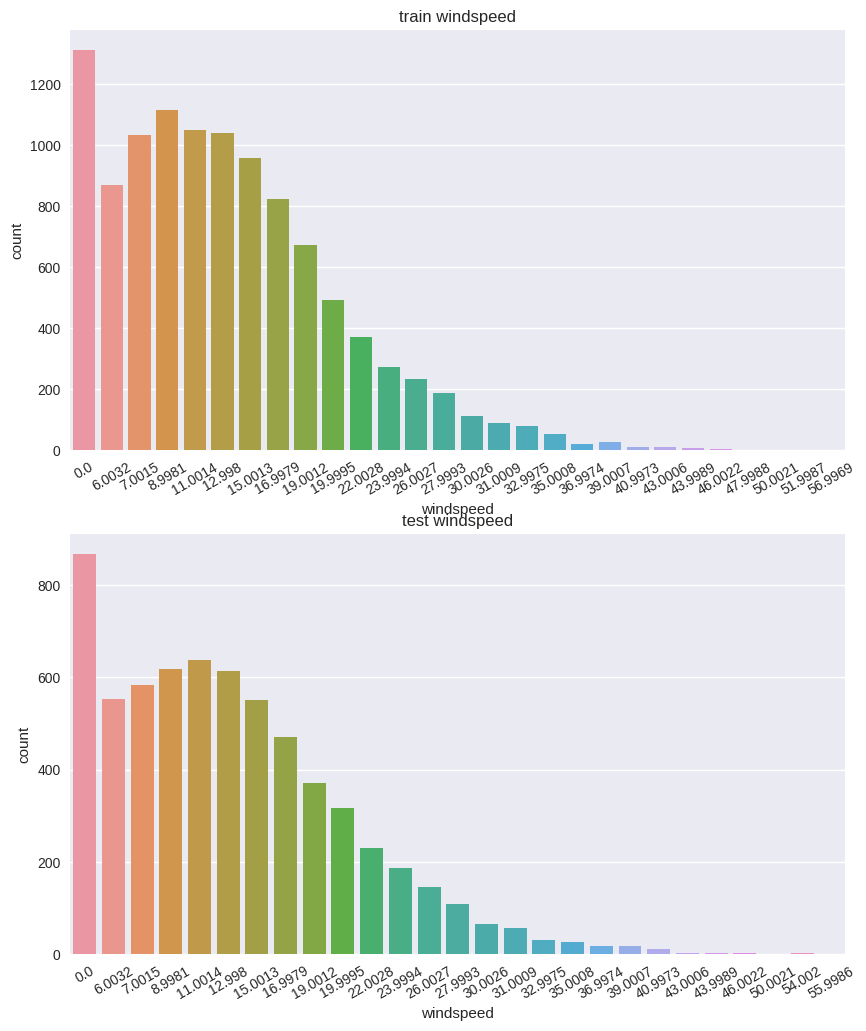

In [31]:
fig, ax = plt.subplots(nrows=2, figsize=(10,12))

plt.sca(ax[0]) #현재 축(ax)을 지정된 축(ax)으로 설정
plt.xticks(rotation=30)
ax[0].set(title='train windspeed')
sns.countplot(data=df_train, x="windspeed", ax=ax[0])

plt.sca(ax[1])
plt.xticks(rotation=30)
ax[1].set(title='test windspeed')
sns.countplot(data=df_test, x="windspeed", ax=ax[1])



windspeed=0 대체 하기 전 그래프

In [16]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
  dataWind0 = data.loc[data['windspeed']==0]
  dataWindNot0 = data.loc[data['windspeed']!=0]

  col_list = ['temp','atemp','humidity', 'season', 'weather','day']
  #풍속과 관련된 변수들을 설정 -> 온도, 습도, 등등

  dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype("str")

  rf_wind = RandomForestClassifier()
  #windspeed!=0인 컬럼으로 fit
  rf_wind.fit(dataWindNot0[col_list], dataWindNot0["windspeed"]) #model.fit(X_train, y_train)
  wind0 = rf_wind.predict(X=dataWind0[col_list])                 #model.predict(X_val)

  dataWind0['windspeed'] = wind0 # predict한 값으로 대체

  data = dataWindNot0.append(dataWind0) #WindNot0, Wind0을 합쳐줌

  data['windspeed'] = data['windspeed'].astype("float")

  data.reset_index(inplace=True)
  data.drop("index", inplace=True, axis=1)

  return data

In [17]:
df_train = predict_windspeed(df_train)
df_test = predict_windspeed(df_test)

In [25]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'year_month', 'count_log'],
      dtype='object')

In [18]:
display(df_train[df_train['windspeed']==0])
display(df_test.loc[df_test['windspeed']==0])

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,year,month,day,hour,minute,second,dayofweek,year_month,count_log


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,year_month


<Axes: title={'center': 'test windspeed'}, xlabel='windspeed', ylabel='count'>

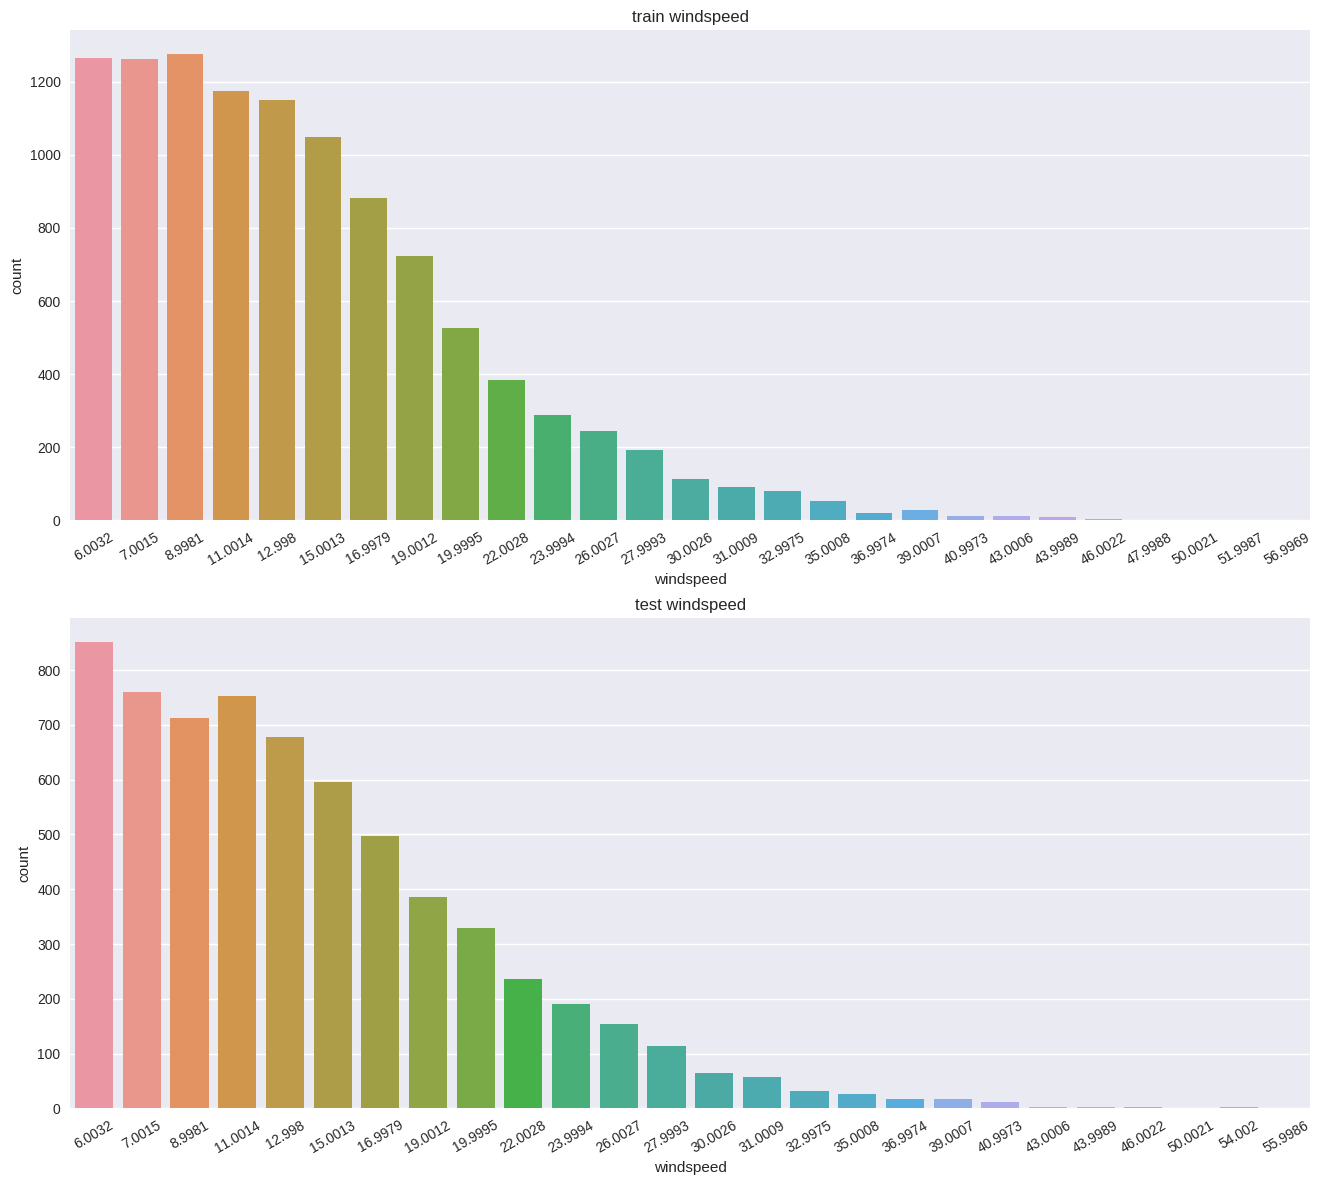

In [53]:
fig, ax = plt.subplots(nrows=2, figsize=(16,14))

plt.sca(ax[0])
plt.xticks(rotation=30)
ax[0].set(title='train windspeed')
sns.countplot(data=df_train, x="windspeed", ax=ax[0])


plt.sca(ax[1])
plt.xticks(rotation=30)
ax[1].set(title='test windspeed')
sns.countplot(data=df_test, x="windspeed", ax=ax[1])

In [27]:
#correlation 확인
df_train[["count_log","windspeed"]].corr()

,count_log,windspeed
count_log,1.000000,0.123337
windspeed,0.123337,1.000000


### categorical one-hot encoding

In [19]:
df_train = pd.get_dummies(df_train, columns=['weather'], prefix='weather')
df_test =  pd.get_dummies(df_test, columns=['weather'], prefix='weather')

df_train = pd.get_dummies(df_train, columns=['season'], prefix='season')
df_test = pd.get_dummies(df_test, columns=['season'], prefix='season')

In [20]:
df_train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,year_month,count_log,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,2011-01-01 05:00:00,0,0,9.84,12.880,75,6.0032,0,1,1,...,2011-1,0.000000,0,1,0,0,1,0,0,0
1,2011-01-01 10:00:00,0,0,15.58,19.695,76,16.9979,12,24,36,...,2011-1,3.583519,1,0,0,0,1,0,0,0
2,2011-01-01 11:00:00,0,0,14.76,16.665,81,19.0012,26,30,56,...,2011-1,4.025352,1,0,0,0,1,0,0,0
3,2011-01-01 12:00:00,0,0,17.22,21.210,77,19.0012,29,55,84,...,2011-1,4.430817,1,0,0,0,1,0,0,0
4,2011-01-01 13:00:00,0,0,18.86,22.725,72,19.9995,47,47,94,...,2011-1,4.543295,0,1,0,0,1,0,0,0


In [21]:
df_train.drop('count', axis=1, inplace=True)

In [22]:
#submission을 위해 df_test의 datetime은 따로 빼놓기
test_datetime = df_test['datetime']
df_train.drop(['datetime', 'workingday', 'atemp', 'registered', 'casual', 'minute', 'second','year_month'], axis = 1, inplace = True)
df_test.drop(['datetime', 'workingday', 'atemp', 'minute', 'second','year_month'], axis = 1, inplace = True)

In [30]:
df_train.columns

Index(['holiday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'year_month', 'count_log', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'season_1', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

test랑 맞춰서 잘 제거하기..!

### Modeling

In [34]:
import scipy as sci
from imblearn import under_sampling, over_sampling, combine
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#import catboost as cb
import xgboost as xgb

from scipy.stats import spearmanr

from xgboost import XGBClassifier, XGBRegressor
#from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin

from sklearn.metrics import confusion_matrix,roc_auc_score, classification_report, precision_recall_curve, balanced_accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score, auc


from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import *
from imblearn.ensemble import BalancedBaggingClassifier

In [35]:
df_test.shape

(6493, 17)

In [32]:
display(df_train.drop('count', axis=1))
display(df_train.drop('count', axis=1).values)

,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek,count_log,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,0,9.84,12.880,75,6.0032,2011,1,1,5,5,0.000000,0,1,0,0,1,0,0,0
1,0,15.58,19.695,76,16.9979,2011,1,1,10,5,3.583519,1,0,0,0,1,0,0,0
2,0,14.76,16.665,81,19.0012,2011,1,1,11,5,4.025352,1,0,0,0,1,0,0,0
3,0,17.22,21.210,77,19.0012,2011,1,1,12,5,4.430817,1,0,0,0,1,0,0,0
4,0,18.86,22.725,72,19.9995,2011,1,1,13,5,4.543295,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,1,16.40,20.455,87,6.0032,2012,12,17,12,0,5.446737,0,1,0,0,0,0,0,1
10842,1,17.22,21.210,88,8.9981,2012,12,17,15,0,5.351858,0,1,0,0,0,0,0,1
10843,1,15.58,19.695,94,6.0032,2012,12,18,8,1,6.495266,1,0,0,0,0,0,0,1
10844,1,13.94,16.665,49,12.9980,2012,12,18,22,1,4.882802,1,0,0,0,0,0,0,1


array([[ 0.   ,  9.84 , 12.88 , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 15.58 , 19.695, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 14.76 , 16.665, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 1.   , 15.58 , 19.695, ...,  0.   ,  0.   ,  1.   ],
       [ 1.   , 13.94 , 16.665, ...,  0.   ,  0.   ,  1.   ],
       [ 1.   , 12.3  , 15.91 , ...,  0.   ,  0.   ,  1.   ]])

In [33]:
from sklearn.metrics import confusion_matrix,roc_auc_score, classification_report, precision_recall_curve, balanced_accuracy_score


def evaluate(y_test, pred):
    res=[]
    res_table=[]

    # confusion matrix
    cm = confusion_matrix(y_test, pred); print(cm)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    res.extend([TP, FN, TN, FP])

    accuracy = accuracy_score(y_test, pred) ;print(f'Mean accuracy score: {accuracy:.3}'); res.append(accuracy)
    recall =recall_score(y_test, pred) ; print(f'recall: {recall: .3}') ; res.append(recall)
    precision= precision_score(y_test, pred) ; print(f'precision: {precision: .3}') ; res.append(precision)
    auc= roc_auc_score(y_test, pred) ; print(f'auc: {auc: .3}') ; res.append(auc)
    f1= f1_score(y_test, pred) ; print(f'f1: {f1: .3}') ; res.append(f1)

    res_table.append(res)
    df=pd.DataFrame(res_table, columns = ['TP', 'FN', 'TN', 'FP','accuracy','Recall','Precision', 'AUC', 'F1-Score'])
    df.index.name="Model"

    return df

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = df_train.drop('count_log', axis=1).values
y = df_train['count_log'].values
X_test = df_test.values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [45]:
print(df_test.columns)
print(df_test.shape)

Index(['holiday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'season_1',
       'season_2', 'season_3', 'season_4'],
      dtype='object')
(6493, 16)


In [46]:
print(df_train.columns)
print(df_train.shape)
print(X_val.shape)


Index(['holiday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'count_log', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4'],
      dtype='object')
(10846, 17)
(2170, 16)


#### Gradient Boost

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05, max_depth=4,
                                         min_samples_leaf=15, min_samples_split=10,
                                         random_state=42)
gb_regressor.fit(X_train, y_train) #eval_metric='rmse'
#gradient boosting에는 eval_set keyword argument, njobs가 없음

gb_predict = gb_regressor.predict(X_val)
# eval_gb_predict = evaluate(gb_predict, y_val)
# eval_gb_predict

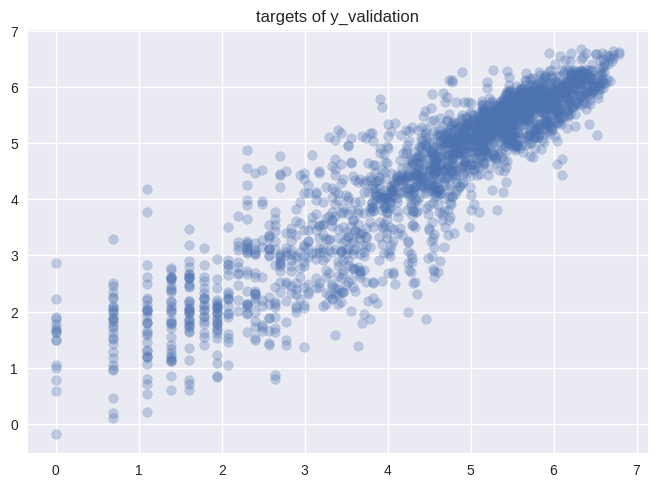

In [69]:
plt.scatter(y_val, gb_predict, alpha=0.3)
plt.title("targets of y_validation")
plt.show()

In [70]:
gb_regressor.score

<bound method RegressorMixin.score of GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)>

In [71]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print("R^2 : ", r2_score(y_val, gb_predict))
print("MAE :", mean_absolute_error(y_val,gb_predict))
print("RMSE:",np.sqrt(mean_squared_error(y_val, gb_predict)))


R^2 :  0.8309673851610214
MAE : 0.4333867351933539
RMSE: 0.6035751380137794


#### linear regression

In [78]:
#linear regression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print("R^2 : ", r2_score(y_val, y_pred))
    print("MAE :", mean_absolute_error(y_val,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_val, y_pred)))

lr_model = LinearRegression()
run_experiment(lr_model)

R^2 :  0.7270832679376293
MAE : 0.5807536505417376
RMSE: 0.7735780047812157


#### xgboost

In [60]:
xgb_regressor= XGBRegressor(random_state=42, n_jobs=-1)
xgb_regressor.fit(X_train, y_train,
            eval_set = [(X_train, y_train),(X_val, y_val)],
            eval_metric='rmse')
xgb_prediction = xgb_regressor.predict(X_val)

[0]	validation_0-rmse:1.14528	validation_1-rmse:1.13331
[1]	validation_0-rmse:0.92288	validation_1-rmse:0.91864
[2]	validation_0-rmse:0.78352	validation_1-rmse:0.79194
[3]	validation_0-rmse:0.69935	validation_1-rmse:0.71839
[4]	validation_0-rmse:0.64746	validation_1-rmse:0.67522
[5]	validation_0-rmse:0.61124	validation_1-rmse:0.65093
[6]	validation_0-rmse:0.58674	validation_1-rmse:0.63724
[7]	validation_0-rmse:0.57027	validation_1-rmse:0.63138
[8]	validation_0-rmse:0.55675	validation_1-rmse:0.62506
[9]	validation_0-rmse:0.54677	validation_1-rmse:0.62239
[10]	validation_0-rmse:0.53648	validation_1-rmse:0.62032
[11]	validation_0-rmse:0.53016	validation_1-rmse:0.61842
[12]	validation_0-rmse:0.52460	validation_1-rmse:0.61625
[13]	validation_0-rmse:0.52114	validation_1-rmse:0.61502
[14]	validation_0-rmse:0.51777	validation_1-rmse:0.61412
[15]	validation_0-rmse:0.51439	validation_1-rmse:0.61315
[16]	validation_0-rmse:0.51316	validation_1-rmse:0.61211
[17]	validation_0-rmse:0.50809	validation

In [61]:
xgb_regressor.score(X_val, y_val)

0.8347022128934075

In [62]:
print("R^2 : ", r2_score(y_val, xgb_prediction))
print("MAE :", mean_absolute_error(y_val,xgb_prediction))
print("RMSE:",np.sqrt(mean_squared_error(y_val, xgb_prediction)))

R^2 :  0.8347022128934075
MAE : 0.42875719184562944
RMSE: 0.5968698026421082


#### lgbm 모델링

In [50]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.3 MB/s eta 0:00:00


In [54]:
#lgbm 이용

import optuna
from optuna import Trial
from optuna.samplers import TPESampler

from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
sampler = TPESampler(seed=10)


def objective(trial):

    lgbm_param = {
        'objective': 'regression',
        'verbose': -1,
        'metric': 'mse',
        'num_leaves': trial.suggest_int('num_leaves', 2, 1024, step=1, log=True),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 0.0, 10.0),
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model_lgbm = LGBMRegressor(**lgbm_param)
    model_lgbm = model_lgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)]) #early_stopping_rounds=25)

    MSE = mean_squared_error(y_val, model_lgbm.predict(X_val))
    return MSE

optuna_lgbm = optuna.create_study(direction='minimize', sampler=sampler)

# * n_trials : optuna를 몇번 실행하여 hyper parameter를 찾을 것인지
optuna_lgbm.optimize(objective, n_trials=100)

[I 2023-10-11 06:01:27,038] A new study created in memory with name: no-name-af69251a-c763-4eba-ab79-bdabd7f53464
[I 2023-10-11 06:01:33,605] Trial 0 finished with value: 2.1554931826539696 and parameters: {'num_leaves': 230, 'colsample_bytree': 0.7062255848078204, 'reg_alpha': 0.6336482349262754, 'reg_lambda': 7.488038825386118, 'max_depth': 9, 'learning_rate': 2.2324403996622945e-07, 'n_estimators': 674, 'min_child_samples': 78, 'subsample': 0.46704202331689854}. Best is trial 0 with value: 2.1554931826539696.
[I 2023-10-11 06:01:36,245] Trial 1 finished with value: 0.8034773954745486 and parameters: {'num_leaves': 3, 'colsample_bytree': 0.9056079455103392, 'reg_alpha': 0.9533933461949365, 'reg_lambda': 0.039482663279144514, 'max_depth': 9, 'learning_rate': 0.0007511484404875245, 'n_estimators': 1876, 'min_child_samples': 74, 'subsample': 0.5226478358414336}. Best is trial 1 with value: 0.8034773954745486.
[I 2023-10-11 06:01:48,487] Trial 2 finished with value: 1.718731372211751 and

In [55]:
lgbm_trial = optuna_lgbm.best_trial
lgbm_trial_params = lgbm_trial.params
print('Best Trial: score {},\nparams {}'.format(lgbm_trial.value, lgbm_trial_params))
print(lgbm_trial_params)

Best Trial: score 0.3380396124735195,
params {'num_leaves': 44, 'colsample_bytree': 0.9826413548718202, 'reg_alpha': 0.670590287146252, 'reg_lambda': 6.37557292005677, 'max_depth': 10, 'learning_rate': 0.006842792439168945, 'n_estimators': 1599, 'min_child_samples': 17, 'subsample': 0.5587467738718223}
{'num_leaves': 44, 'colsample_bytree': 0.9826413548718202, 'reg_alpha': 0.670590287146252, 'reg_lambda': 6.37557292005677, 'max_depth': 10, 'learning_rate': 0.006842792439168945, 'n_estimators': 1599, 'min_child_samples': 17, 'subsample': 0.5587467738718223}


In [56]:
# Modeling fit
lgbm = LGBMRegressor(**lgbm_trial_params)
lgbm_study = lgbm.fit(X_train, y_train)

# Predict the y_test
lgbm_prediction = lgbm_study.predict(X_val)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 8676, number of used features: 15
[LightGBM] [Info] Start training from score 4.550029


In [57]:
print("R^2 : ", r2_score(y_val, lgbm_prediction))
print("MAE :", mean_absolute_error(y_val,lgbm_prediction))
print("RMSE:",np.sqrt(mean_squared_error(y_val, lgbm_prediction)))

R^2 :  0.8431532875309471
MAE : 0.42510229778219993
RMSE: 0.5814117409147492


In [58]:
lgbm.score(X_val, y_val)

0.8431532875309471

#### AutoML


In [72]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.1 MB/s eta 0:0

In [83]:
!pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [74]:
from pycaret.regression import *

https://pycaret.readthedocs.io/en/latest/api/regression.html

In [77]:
#전처리 및 파이프라인 생성
reg_test_1 = setup(data= df_train,
                   target='count_log',
                   train_size= 0.8,
                   fold=5)

,Description,Value
0,Session id,8242
1,Target,count_log
2,Target type,Regression
3,Original data shape,"(10846, 17)"
4,Transformed data shape,"(10846, 17)"
5,Transformed train set shape,"(8676, 17)"
6,Transformed test set shape,"(2170, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [ ]:
## 모델 생성
# cat = create_model('catboost', cross_validation = True)
# xgb = create_model('xgboost', cross_validation = True)
# gbr = create_model('gbr', cross_validation = True)

# # 하이퍼파라미터 튜닝
# tuned_cat = tune_model(cat, optimize = 'RMSE', n_iter = 10)
# tuned_xgb = tune_model(xgb, optimize = 'RMSE', n_iter = 10)
# tuned_gbr = tune_model(gbr, optimize = 'RMSE', n_iter = 10)

In [78]:
#모델 비교
model = compare_models(sort='mse') #, fold = 5, n_select=5)
#include : 포함할 머신러닝 모델 유형
# exclude : 제외할 머신러닝 모델 유형
# fold : 교차 검증(k)
# sort : 정렬 기준 스코어
# n_select : 반환할 top_n 모델 수


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4240,0.3385,0.5817,0.8472,0.1633,0.1331,0.7100
xgboost,Extreme Gradient Boosting,0.4160,0.3433,0.5858,0.8450,0.1653,0.1313,0.2660
gbr,Gradient Boosting Regressor,0.4491,0.3672,0.6059,0.8343,0.1699,0.1414,1.0420
rf,Random Forest Regressor,0.4296,0.3771,0.6140,0.8298,0.1732,0.1375,4.1500
et,Extra Trees Regressor,0.4383,0.4061,0.6372,0.8165,0.1792,0.1413,3.1280
ada,AdaBoost Regressor,0.5805,0.5453,0.7384,0.7537,0.1934,0.1683,0.3240
dt,Decision Tree Regressor,0.5502,0.7079,0.8410,0.6802,0.2395,0.1795,0.0780
knn,K Neighbors Regressor,0.6524,0.8073,0.8982,0.6361,0.2401,0.2129,0.2180
br,Bayesian Ridge,0.8321,1.1439,1.0694,0.4837,0.2723,0.2717,0.0520
lr,Linear Regression,0.8322,1.1441,1.0695,0.4836,0.2723,0.2717,1.6600


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [80]:
#모델 튜닝
best_tune = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4467,0.3592,0.5993,0.8326,0.1619,0.1384
1,0.4436,0.3645,0.6037,0.8264,0.1683,0.1353
2,0.4439,0.3525,0.5938,0.8408,0.1656,0.1383
3,0.4515,0.3794,0.6160,0.8287,0.1797,0.1472
4,0.4482,0.3809,0.6172,0.8426,0.1756,0.1472
Mean,0.4468,0.3673,0.6060,0.8342,0.1702,0.1413
Std,0.0029,0.0112,0.0092,0.0065,0.0065,0.0050


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [84]:
#모델 학습 정보 시각화
evaluate_model(best_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

?

In [82]:
#예측값 보기
predict_model(best_tune)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4240,0.3481,0.5900,0.8388,0.1659,0.1350


,holiday,temp,humidity,windspeed,year,month,day,hour,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,count_log,prediction_label
6126,0,20.500000,39,16.9979,2012,4,8,23,1,0,0,0,0,1,0,0,3.931826,4.664835
6494,0,20.500000,82,15.0013,2012,5,7,9,0,1,0,0,0,1,0,0,5.857933,5.443999
4823,0,8.200000,59,6.0032,2012,1,5,4,0,1,0,0,1,0,0,0,1.609438,1.044639
2191,0,31.160000,70,7.0015,2011,6,9,8,0,1,0,0,0,1,0,0,6.068426,5.751759
9715,0,22.959999,64,7.0015,2011,5,8,19,1,0,0,0,0,1,0,0,5.476463,5.852085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9165,0,9.840000,93,8.9981,2012,12,2,7,0,1,0,0,0,0,0,1,3.433987,4.181549
49,0,9.840000,35,19.0012,2011,1,3,13,1,0,0,0,1,0,0,0,4.110874,4.274414
511,0,10.660000,93,11.0014,2011,2,8,4,1,0,0,0,1,0,0,0,1.098612,0.489223
2132,0,31.160000,33,8.9981,2011,6,6,16,1,0,0,0,0,1,0,0,5.587249,5.829575


In [ ]:
#test data로 평가하기
#predict_model(best_tune, data= df_test)

In [86]:
np.exp(predict_model(best_tune)['count_log'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4240,0.3481,0.5900,0.8388,0.1659,0.1350


6126     50.999996
6494    349.999969
4823      5.000000
2191    432.000031
9715    238.999939
           ...    
9165     30.999996
49       60.999989
511       3.000000
2132    267.000061
2509     73.000015
Name: count_log, Length: 2170, dtype: float32

### submission

In [95]:
df_test.shape

(6493, 9)

In [39]:
samplesub = pd.read_csv(os.path.join(path,'sampleSubmission.csv'))
samplesub

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [41]:
regressor = GradientBoostingRegressor(n_estimators = 2000
					, learning_rate = 0.05
                                    , max_depth = 5
                                    , min_samples_leaf = 15
                                    , min_samples_split = 10
                                    , random_state = 42)
#model.fit(x, y)
regressor.fit(X_train, y_train)

score_train = regressor.score(X_train, y_train)
score_val = regressor.score(X_val, y_val)

print("train score: %f" %score_train)
print("validation score: %f" %score_val)

train score: 1.000000
validation score: 0.999998


In [44]:
df_train.columns

Index(['workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'year',
       'month', 'day', 'hour', 'dayofweek', 'count_log', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [53]:
df_train.shape

(10846, 19)

In [66]:
X_train.shape

(8676, 18)

In [67]:
X_test.shape

(6493, 17)

In [48]:
use_lovals = 1

gb_predict_test = gb_regressor.predict(X_test)

submission_gb = pd.DataFrame()
submission_gb['datetime']= test_datetime
submission_gb['count'] = gb_predict_test

if use_lovals==1:#log취해줬던 값을 다시 exp 취해서 원상복귀
  submission_gb['count'] = np.exp(submission_gb['count'])

print(submission_gb)

                datetime       count
0    2011-01-20 00:00:00   11.552555
1    2011-01-20 03:00:00    3.643420
2    2011-01-20 04:00:00    1.813710
3    2011-01-20 05:00:00    1.863735
4    2011-01-20 06:00:00    6.580365
...                  ...         ...
6488 2012-12-29 12:00:00  218.569765
6489 2012-12-29 13:00:00  217.807445
6490 2012-12-29 15:00:00  128.164030
6491 2012-12-29 23:00:00   70.967822
6492 2012-12-30 19:00:00  303.629435

[6493 rows x 2 columns]


In [ ]:
submission_gb.to_csv('bike.csv', index=False)

결론:train, test 각각 변수들 맞춰서 drop 잘 해주기..